# Analysis on Wine Quality

# Introduction

- Domain knowledge is essential and always recommended, especially if you are trying to analyze and model data from diverse domains.
- Wine is an alcoholic beverage made by the process of fermentation of grapes, without the addition of sugars, acids, enzymes, water, or other nutrients. 
- Red and white wine are two variants. 
- Red wine is made from dark red and black grapes. The color ranges from various shades of red, brown, and violet. This is produced with whole grapes, including the skin, which adds to the color and flavor of red wines giving it a rich flavor. 
- White wine is made from white grapes with no skins or seeds. The color is usually straw-yellow, yellow-green, or yellow-gold. Most white wines have a light and fruity flavor as compared to richer red wines.

#  Problem  Statement

- The given that deals with physicochemical properties of wine and our task is to you guess the wine type and quality.
- The datasets used in this chapter are available in the very popular UCI Machine Learning Repository under the name of Wine Quality Data Set.
- You can access more details at https://archive.ics.uci.edu/ml/datasets/wine+quality, which gives you access to the raw datasets as well as details about the various features in the datasets. 
- To be more specific, the wine datasets are related to red and white vinho verde wine samples, from the north of Portugal. - To summarize our main objectives, we will be trying to solve the following major problems by leveraging Machine Learning and data analysis on our wine quality dataset.
    1. Predict if each wine sample is a red or white wine.
    2. Predict the quality of each wine sample, which can be low, medium, or high.

# Importing Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Data Loading

In [220]:
wine_data = pd.read_csv('wine_quality.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [221]:
# Making Two DataFrames For Visualization
red_wine = pd.DataFrame(wine_data[wine_data['type'] == 'red'])
white_wine = pd.DataFrame(wine_data[wine_data['type'] == 'white'])

In [222]:
red_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Dataset Description

In [223]:
white_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Data Set Information:**

- The dataset was downloaded from the UCI Machine Learning Repository.

- The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

- Two datasets were combined and few values were randomly removed.

**Attribute Information:**

- Input variables (based on physicochemical tests):
    0. type
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
    10. sulphates
    11. alcohol
- Output variable (based on sensory data):
    12. quality (score between 0 and 10)

**Acknowledgements:**

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# EDA and Feature Engineering

In [224]:
# Lable 1 type
print('The number of Unique Values in type is : {} and the values are : {}'.format(wine_data['type'].nunique(), 
                                                                               wine_data['type'].unique()))

The number of Unique Values in type is : 2 and the values are : ['white' 'red']


In [225]:
# Lable 2 quality

# Wine quality scores of 3, 4, and 5 are mapped to low quality wines 
# Wine quality scores of 6 and 7 are mapped to medium quality wines 
# Wine quality scores of 8 and 9 are mapped to high quality wines 

# Applying FE
wine_data['quality_label'] = wine_data['quality'].apply(lambda value : 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
wine_data['quality_label'] = wine_data['quality_label'].astype('category')

In [226]:
wine_data.dtypes

type                      object
fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
quality_label           category
dtype: object

In [227]:
# Null value Analysis
wine_data.isnull().values.sum()

38

In [228]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


**Observations**
- Since there are some null values we need to make further analysis

# Understanding Dataset Features

In [229]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB


Our dataset has a total of 14 attributes and they are described as follows.
- **fixed acidity:** 
    - Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine. Reducing acids significantly might lead to wines tasting flat. Fixed acids include tartaric, malic, citric, and succinic acids, which are found in grapes (except succinic). This variable is usually expressed in g(tartaric_acid) / (dm)^3 in the dataset.
- **volatile acidity:** 
    - These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid, though other acids like lactic, formic, and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. In the United States, the legal limits of volatile acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. The volatile acidity is expressed in g(acetic_acid) / (dm)^3 in the dataset.
- **citric acid:** 
    - This is one of the fixed acids that gives a wine its freshness. Usually most of it is consumed during the fermentation process and sometimes it is added separately to give the wine more freshness. It’s usually expressed in g / (dm)^3 in the dataset.
- **residualsugar:** 
    - This typically refers to the natural sugar from grapes that remains after the fermentation process stops, or is stopped. It’s usually expressed in g / (dm)^3 in the dataset.
- **chlorides:** 
    - This is usually a major contributor to saltiness in wine. It’s usually expressed in g(sodium_chloride) / (dm)^3 in the dataset.
- **free sulfur dioxide:**
    - This is the part of the sulfur dioxide that, when added to a wine, is said to be free after the remaining part binds. Winemakers will always try to get the highest proportion of free sulfur to bind. They are also known as sulfites and too much is undesirable and gives a pungent odor. This variable is expressed in mg / (dm)^3 in the dataset.
- **total sulfur dioxide:** 
    - This is the sum total of the bound and the free sulfur dioxide (SO2). Here, it’s expressed in mg / (dm)^3. This is mainly added to kill harmful bacteria and preserve quality and freshness. There are usually legal limits for sulfur levels in wines and excess of it can even kill good yeast and produce an undesirable odor.
- **density:** 
    - This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol. Here, it’s expressed in g / (cm)^3.
- **pH:** 
    - Also known as the potential of hydrogen, this is a numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most toward the pH of wines. You might know, solutions with a pH less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.
- **sulphates:** 
    - These are mineral salts containing sulfur. Sulphates are to wine as gluten is to food. They are a regular part of the winemaking around the world and are considered essential. They are connected to the fermentation process and affect the wine aroma and flavor. Here, they are expressed in g (potassium_sulphate) / (dm)^3 in the dataset.
- **alcohol:** 
    - Wine is an alcoholic beverage. Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol can vary from wine to wine. Hence it is not a surprise for this attribute to be a part of this dataset. It’s usually measured in % vol or alcohol by volume (ABV).
- **quality:** 
    - Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.
- **wine_type:** 
    - Since we originally had two datasets for red and white wine, we introduced this attribute in the final merged dataset, which indicates the type of wine for each data point. A wine can be a red or a white wine. One of the predictive models we will build in this chapter would be such that we can predict the type of wine by looking at other wine attributes
- **quality_label:** 
    - This is a derived attribute from the quality attribute. We bucket or group wine quality scores into three qualitative buckets, namely low, medium, and high. Wines with a quality score of 3, 4, and 5 are low quality; scores of 6 and 7 are medium quality; and scores of 8 and 9 are high quality wines. We will also build another model in this chapter to predict this wine quality label based on other wine attributes.

#  Descriptive  Statistics

In [230]:
# For type stat
subset_att_1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']
subset_att_2 = ['total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality_label']

In [231]:
# For subset_att_1

red_stat = round(wine_data[wine_data['type'] == 'red'][subset_att_1].describe(),2)
white_stat = round(wine_data[wine_data['type'] == 'white'][subset_att_1].describe(),2)
pd.concat([red_stat, white_stat], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                              \
            fixed acidity volatile acidity citric acid residual sugar   
count             1597.00          1598.00     1598.00        1599.00   
mean                 8.32             0.53        0.27           2.54   
std                  1.74             0.18        0.19           1.41   
min                  4.60             0.12        0.00           0.90   
25%                  7.10             0.39        0.09           1.90   
50%                  7.90             0.52        0.26           2.20   
75%                  9.20             0.64        0.42           2.60   
max                 15.90             1.58        1.00          15.50   

                                    White Wine Statistics                   \
      chlorides free sulfur dioxide         fixed acidity volatile acidity   
count   1599.00             1599.00               4890.00          4891.00   
mean       0.09               15.87                  6.86             0.28   
std        0.05               10.46                  0.84             0.10   
min        0.01                1.00                  3.80             0.08   
25%        0.07                7.00                  6.30             0.21   
50%        0.08               14.00                  6.80             0.26   
75%        0.09               21.00                  7.30             0.32   
max        0.61               72.00                 14.20             1.10   

                                                                
      citric acid residual sugar chlorides free sulfur dioxide  
count     4896.00        4896.00   4896.00             4898.00  
mean         0.33           6.39      0.05               35.31  
std          0.12           5.07      0.02               17.01  
min          0.00           0.60      0.01                2.00  
25%          0.27           1.70      0.04               23.00  
50%          0.32           5.20      0.04               34.00  
75%          0.39           9.90      0.05               46.00  
max          1.66          65.80      0.35              289.00

**Observations**
1.  mean value of residual sugar content in white wine seems to be bit higher than red wine.
2. mean value of free sulfur dioxide content in white wine seems to be much higher than red wine.

In [232]:
# For subset_att_2

red_stat = round(wine_data[wine_data['type'] == 'red'][subset_att_2].describe(),2)
white_stat = round(wine_data[wine_data['type'] == 'white'][subset_att_2].describe(),2)
pd.concat([red_stat, white_stat], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                       \
      total sulfur dioxide  density       pH sulphates  alcohol   
count              1599.00  1599.00  1597.00   1597.00  1599.00   
mean                 46.47     1.00     3.31      0.66    10.42   
std                  32.90     0.00     0.15      0.17     1.07   
min                   6.00     0.99     2.74      0.33     8.40   
25%                  22.00     1.00     3.21      0.55     9.50   
50%                  38.00     1.00     3.31      0.62    10.20   
75%                  62.00     1.00     3.40      0.73    11.10   
max                 289.00     1.00     4.01      2.00    14.90   

      White Wine Statistics                                       
       total sulfur dioxide  density       pH sulphates  alcohol  
count               4898.00  4898.00  4891.00   4896.00  4898.00  
mean                 138.36     0.99     3.19      0.49    10.51  
std                   42.50     0.00     0.15      0.11     1.23  
min                    9.00     0.99     2.72      0.22     8.00  
25%                  108.00     0.99     3.09      0.41     9.50  
50%                  134.00     0.99     3.18      0.47    10.40  
75%                  167.00     1.00     3.28      0.55    11.40  
max                  440.00     1.04     3.82      1.08    14.20

**Observations**
1.  mean value of total sulfur dioxide content in white wine seems to be bit higher than red wine.

In [233]:
# For quality_label stat

subset_att_1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
subset_att_2 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
subset_att_3 = ['pH', 'sulphates', 'alcohol']

In [234]:
# for subset_att_1

lq_stat = round(wine_data[wine_data['quality_label'] == 'low'][subset_att_1].describe(),2)
mq_stat = round(wine_data[wine_data['quality_label'] == 'medium'][subset_att_1].describe(),2)
hq_stat = round(wine_data[wine_data['quality_label'] == 'high'][subset_att_1].describe(),2)
pd.concat([lq_stat, mq_stat, hq_stat], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                              \
         fixed acidity volatile acidity citric acid residual sugar   
count          2379.00          2382.00     2383.00        2384.00   
mean              7.33             0.40        0.30           5.65   
std               1.27             0.19        0.16           4.92   
min               4.20             0.10        0.00           0.60   
25%               6.50             0.26        0.21           1.80   
50%               7.10             0.34        0.29           2.90   
75%               7.80             0.50        0.40           8.52   
max              15.90             1.58        1.00          23.50   

      Medium Quality Wine                                              \
            fixed acidity volatile acidity citric acid residual sugar   
count             3911.00          3909.00     3913.00        3913.00   
mean                 7.16             0.31        0.33           5.33   
std                  1.31             0.14        0.13           4.68   
min                  3.80             0.08        0.00           0.70   
25%                  6.40             0.21        0.26           1.80   
50%                  6.90             0.27        0.31           3.00   
75%                  7.60             0.36        0.39           7.90   
max                 15.60             1.04        1.66          65.80   

      High Quality Wine                                              
          fixed acidity volatile acidity citric acid residual sugar  
count            197.00           198.00      198.00         198.00  
mean               6.85             0.29        0.33           5.35  
std                1.15             0.12        0.10           4.16  
min                3.90             0.12        0.03           0.80  
25%                6.20             0.21        0.28           2.00  
50%                6.80             0.28        0.32           4.05  
75%                7.30             0.35        0.37           7.57  
max               12.60             0.85        0.74          14.80

**Observations**
1.  Nothing much can be seen here

In [235]:
#for subset_att_2

lq_stat = round(wine_data[wine_data['quality_label'] == 'low'][subset_att_2].describe(),2)
mq_stat = round(wine_data[wine_data['quality_label'] == 'medium'][subset_att_2].describe(),2)
hq_stat = round(wine_data[wine_data['quality_label'] == 'high'][subset_att_2].describe(),2)
pd.concat([lq_stat, mq_stat, hq_stat], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                                    \
             chlorides free sulfur dioxide total sulfur dioxide  density   
count          2383.00             2384.00              2384.00  2384.00   
mean              0.06               29.48               119.28     1.00   
std               0.04               19.84                61.89     0.00   
min               0.01                2.00                 6.00     0.99   
25%               0.04               14.00                68.00     0.99   
50%               0.05               26.00               124.00     1.00   
75%               0.08               42.00               167.00     1.00   
max               0.61              289.00               440.00     1.00   

      Medium Quality Wine                                                    \
                chlorides free sulfur dioxide total sulfur dioxide  density   
count             3914.00             3915.00              3915.00  3915.00   
mean                 0.05               30.96               113.51     0.99   
std                  0.03               16.33                53.57     0.00   
min                  0.01                1.00                 6.00     0.99   
25%                  0.04               19.00                81.00     0.99   
50%                  0.04               29.00               116.00     0.99   
75%                  0.06               41.00               150.00     1.00   
max                  0.42              112.00               294.00     1.04   

      High Quality Wine                                                   
              chlorides free sulfur dioxide total sulfur dioxide density  
count            198.00              198.00               198.00  198.00  
mean               0.04               34.51               117.48    0.99  
std                0.02               17.08                41.69    0.00  
min                0.01                3.00                12.00    0.99  
25%                0.03               24.00                96.00    0.99  
50%                0.04               34.00               118.50    0.99  
75%                0.04               43.00               145.00    0.99  
max                0.12              105.00               212.50    1.00

**Observations**
1.  Nothing much can be seen here also.

In [236]:
#for subset_att_3

lq_stat = round(wine_data[wine_data['quality_label'] == 'low'][subset_att_3].describe(),2)
mq_stat = round(wine_data[wine_data['quality_label'] == 'medium'][subset_att_3].describe(),2)
hq_stat = round(wine_data[wine_data['quality_label'] == 'high'][subset_att_3].describe(),2)
pd.concat([lq_stat, mq_stat, hq_stat], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                    Medium Quality Wine            \
                    pH sulphates  alcohol                  pH sulphates   
count          2381.00   2382.00  2384.00             3909.00   3913.00   
mean              3.21      0.52     9.87                3.22      0.54   
std               0.16      0.14     0.84                0.16      0.15   
min               2.74      0.25     8.00                2.72      0.22   
25%               3.11      0.44     9.30                3.11      0.43   
50%               3.20      0.50     9.60                3.21      0.51   
75%               3.31      0.58    10.40                3.33      0.61   
max               3.90      2.00    14.90                4.01      1.95   

               High Quality Wine                    
       alcohol                pH sulphates alcohol  
count  3915.00            198.00    198.00  198.00  
mean     10.81              3.23      0.51   11.69  
std       1.20              0.16      0.16    1.27  
min       8.40              2.88      0.25    8.50  
25%       9.80              3.13      0.38   11.00  
50%      10.80              3.23      0.48   12.00  
75%      11.70              3.33      0.60   12.60  
max      14.20              3.72      1.10   14.00

**Observations**
1.  Nothing much can be seen here. But alchohol level is been rising based on the rating of the wine quality.

#  Inferential  Statistics

**Important Notes**
- The inferential statistics is used to draw inferences and propositions of a population using a data sample.
- The idea is to use statistical methods and models to draw statistical inferences from a given hypotheses. Each hypothesis consists of a null hypothesis and an alternative hypothesis. 
- Based on statistical test results, if the result is statistically significant based on pre-set significance levels (e.g., if obtained p-value is less than 5% significance level), we reject the null hypothesis in favor of the alternative hypothesis. 
- Otherwise, if the results is not statistically significant, we conclude that our null hypothesis was correct.

**Our Problem**
- Given multiple data groups or subsets of wine samples based on wine quality rating, is there any way to prove that mean alcohol levels vary significantly among the data groups?

- For our scenario, three data subsets or groups from the data are created based on wine quality ratings. 
- The mean values in the test would be based on the wine alcohol content. 
- So, let’s assume the null hypothesis is that the group means for low, medium, and high quality wine is same and the alternate hypothesis would be that there is a difference (statistically significant) between at least two group means. 
- The following snippet helps us perform the one-way ANOVA test

In [237]:
# Performing one_way ANOVA Test

F_value, p_value = stats.f_oneway(wine_data[wine_data['quality_label'] == 'low']['alcohol'],
                                  wine_data[wine_data['quality_label'] == 'medium']['alcohol'],
                                  wine_data[wine_data['quality_label'] == 'high']['alcohol'])

print('ANOVA test for mean alcohol levels across wine samples with different quality ratings are as follows')
print('F_Statastic : {}             p_value : {}'.format(F_value, p_value))

ANOVA test for mean alcohol levels across wine samples with different quality ratings are as follows
F_Statastic : 673.0745347168153             p_value : 2.271533756892835e-266


**Observations**
1. From the preceding results we can clearly see we have a p-value much less than 0.05 in the test. 
- This tells us that there is a statistically significant difference in alcohol level means for at least two groups out of the three.

Text(0, 0.5, 'Wine Alcohol %')

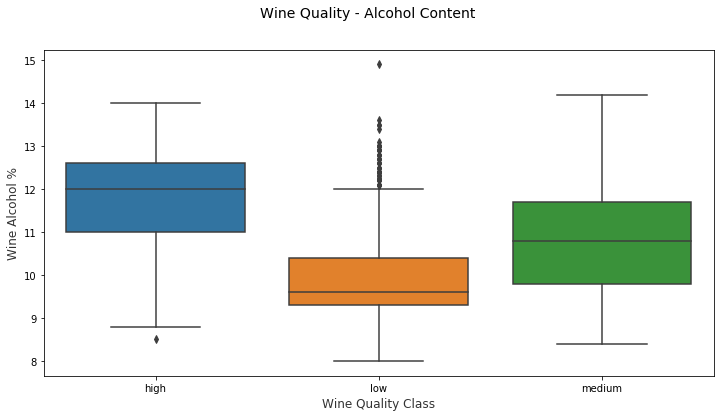

In [238]:
# Visualizing the above Inferential Stats

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Wine Quality - Alcohol Content', fontsize=14)
sns.boxplot(data = wine_data, x = "quality_label", y = "alcohol", ax = ax)
ax.set_xlabel("Wine Quality Class", size = 12, alpha = 0.8)
ax.set_ylabel("Wine Alcohol %", size = 12, alpha = 0.8)

#  Univariate  Analysis

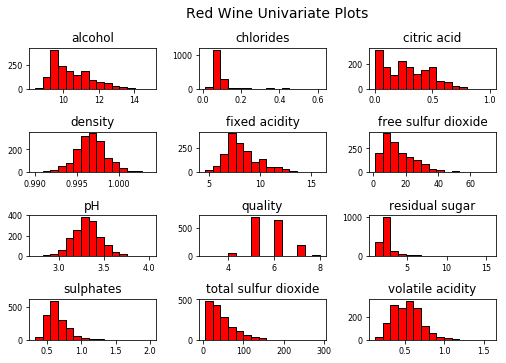

In [239]:
# The simplest way to easily visualize all the variables in your data is to build some histograms.
# For Red wine Data

red_wine.hist(bins = 15, color = 'red', edgecolor = 'black', linewidth = 1.0, xlabelsize = 8, 
              ylabelsize = 8, grid = False) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x = 0.65, y = 1.25, fontsize = 14)

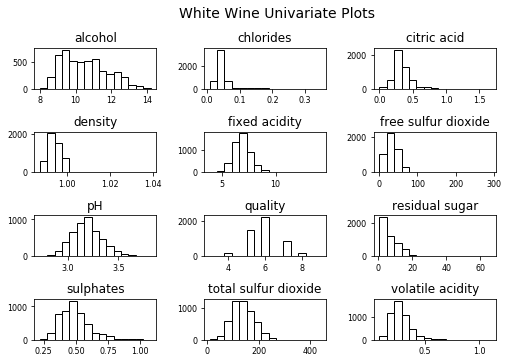

In [240]:
# The simplest way to easily visualize all the variables in your data is to build some histograms.
# For White Wine Data

white_wine.hist(bins = 15, color = 'white', edgecolor = 'black', linewidth=1.0, xlabelsize = 8, 
                ylabelsize = 8, grid = False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
wt = plt.suptitle('White Wine Univariate Plots', x = 0.65, y = 1.25, fontsize = 14)

**Observations:**
- It has been observed from the above plots that some of the Contents in Red and White wines differ so there is need to visualize them closely.
- Visualizing 'alcohol' , 'residual sugar', 'free sulpher dioxide', 'volatile acidity', 'total sulpher dioxide'

## Lets Compare White and Red Wine types using the CONTENTS Seperately

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


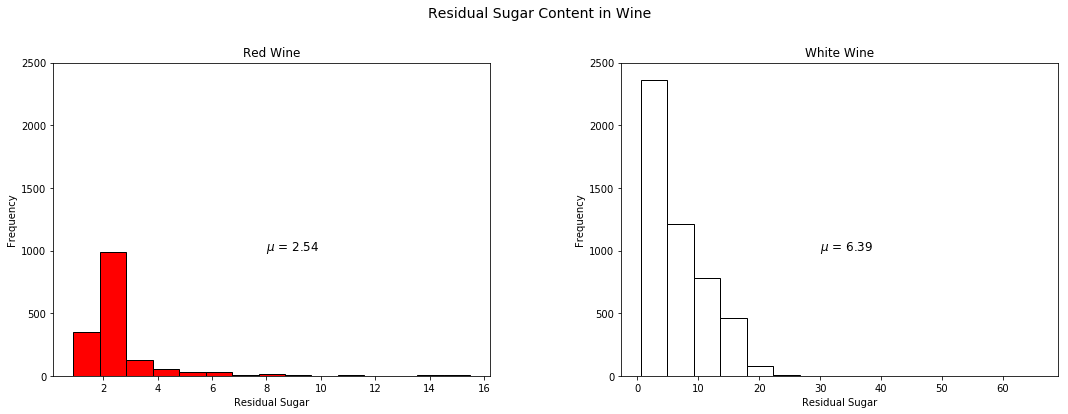

In [241]:
# Residual Sugar Contents

fig = plt.figure(figsize = (18,6))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$ = '+str(round(red_wine['residual sugar'].mean(),2)), fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color = 'red', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$ = '+str(round(white_wine['residual sugar'].mean(),2)), fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color = 'white', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

**Observations:**
- 'residual sugar' contents in white wines seems to be more as compared to red wines.

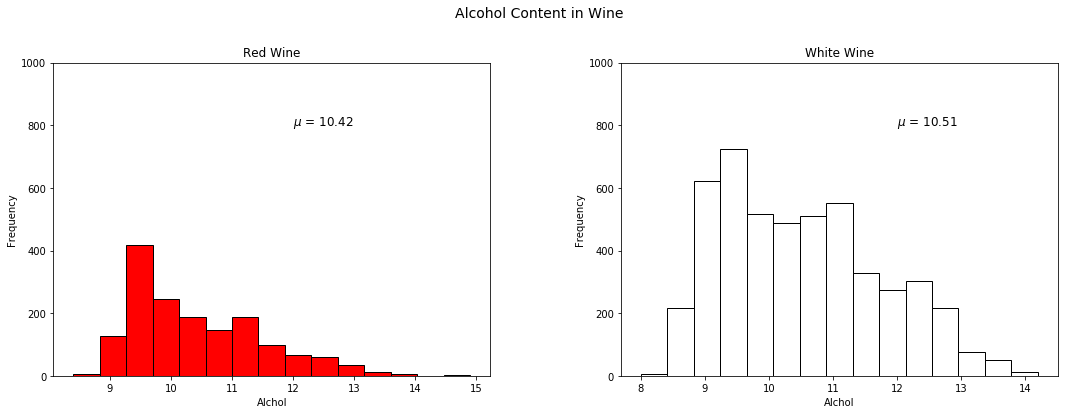

In [242]:
# 'alcohol' Contents

fig = plt.figure(figsize = (18,6))
title = fig.suptitle("Alcohol Content in Wine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Alchol")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 1000])
ax1.text(12, 800, r'$\mu$ = '+str(round(red_wine['alcohol'].mean(),2)), fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['alcohol'], color = 'red', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Alchol")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1000])
ax2.text(12, 800, r'$\mu$ = '+str(round(white_wine['alcohol'].mean(),2)), fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['alcohol'], color = 'white', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

**Observations:**
- 'alcohol' contents in white wines seems to be lil bit more as compared to red wines.

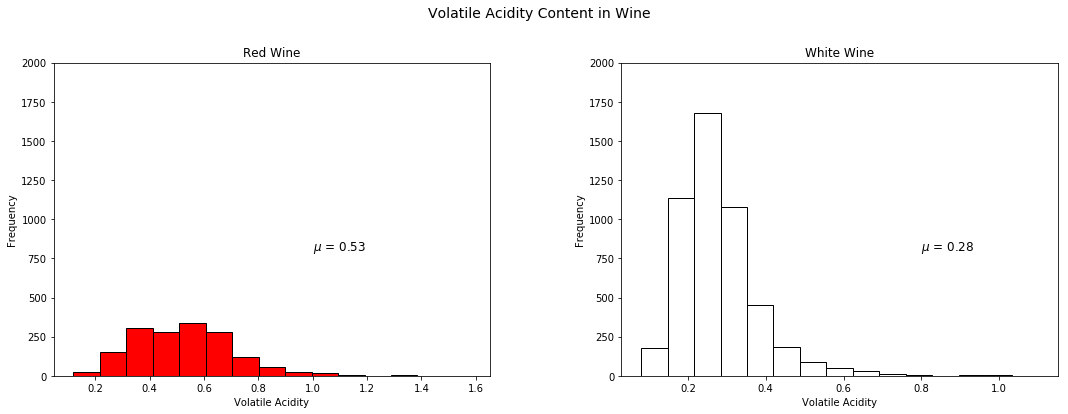

In [243]:
# 'volatile acidity' Contents

fig = plt.figure(figsize = (18,6))
title = fig.suptitle("Volatile Acidity Content in Wine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Volatile Acidity")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2000])
ax1.text(1, 800, r'$\mu$ = '+str(round(red_wine['volatile acidity'].mean(),2)), fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['volatile acidity'], color = 'red', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Volatile Acidity")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2000])
ax2.text(0.8, 800, r'$\mu$ = '+str(round(white_wine['volatile acidity'].mean(),2)), fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['volatile acidity'], color = 'white', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

**Observations:**
- 'volatile acidity' contents in red wines seems to be more as compared to white wines.

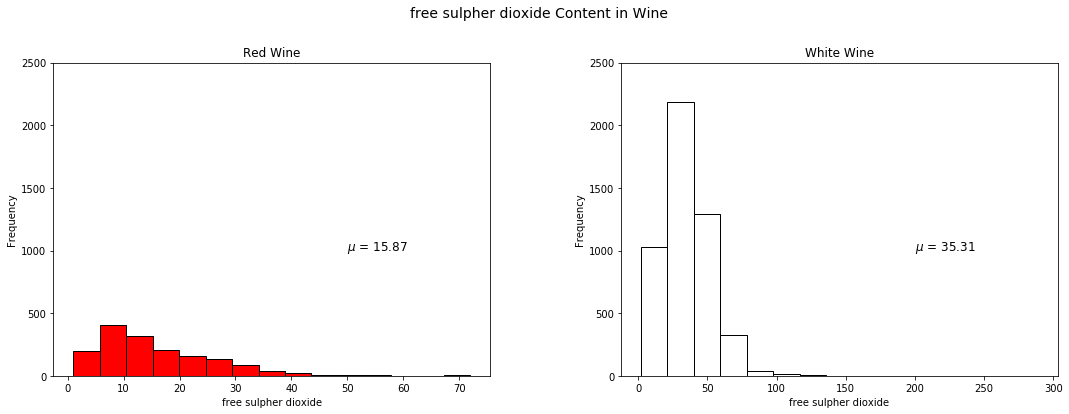

In [244]:
# 'free sulpher dioxide' Contents

fig = plt.figure(figsize = (18,6))
title = fig.suptitle("free sulpher dioxide Content in Wine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("free sulpher dioxide")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(50, 1000, r'$\mu$ = '+str(round(red_wine['free sulfur dioxide'].mean(),2)), fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['free sulfur dioxide'], color = 'red', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("free sulpher dioxide")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(200, 1000, r'$\mu$ = '+str(round(white_wine['free sulfur dioxide'].mean(),2)), fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['free sulfur dioxide'], color = 'white', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

**Observations:**
- 'free sulfer dioxide' contents in white wines seems to be much more as compared to red wines.

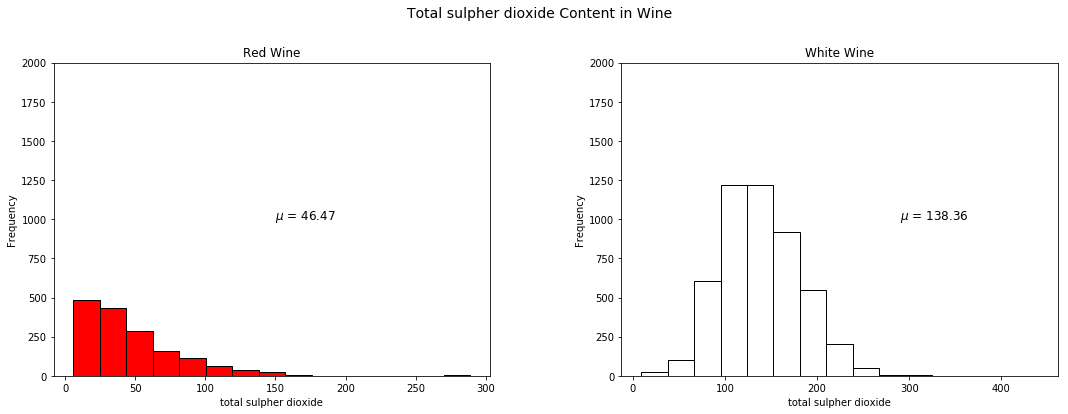

In [245]:
# 'total sulpher dioxide' Contents

fig = plt.figure(figsize = (18,6))
title = fig.suptitle("Total sulpher dioxide Content in Wine", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("total sulpher dioxide")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2000])
ax1.text(150, 1000, r'$\mu$ = '+str(round(red_wine['total sulfur dioxide'].mean(),2)), fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['total sulfur dioxide'], color = 'red', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("total sulpher dioxide")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2000])
ax2.text(290, 1000, r'$\mu$ = '+str(round(white_wine['total sulfur dioxide'].mean(),2)), fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['total sulfur dioxide'], color = 'white', bins = 15, edgecolor = 'black', 
                                     linewidth = 1)

**Observations:**
- 'total sulfer dioxide' contents in white wines seems to be much more as compared to red wines.

# Multivariate Analysis

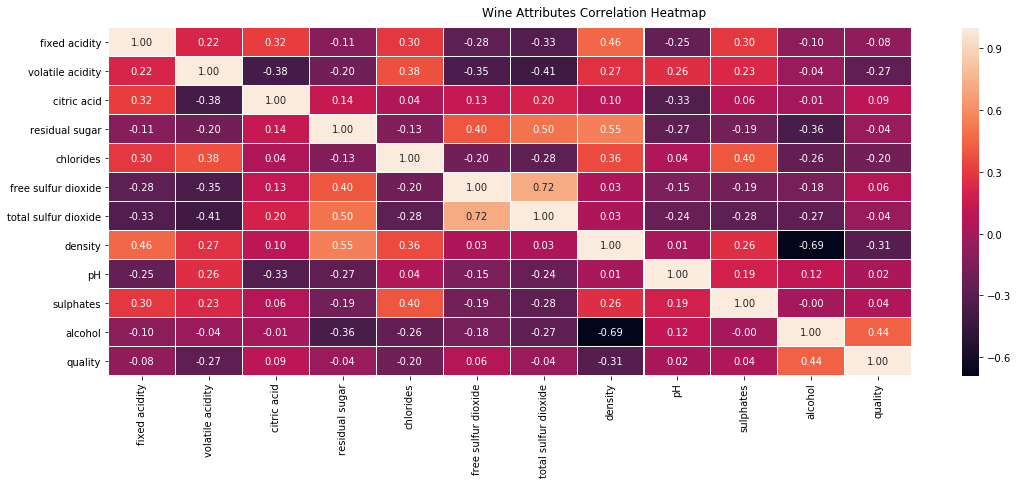

In [246]:
# One of the best ways to analyze features is to build a pairwise correlation plot depicting the correlation 
# coefficient between each pair of features 

fig, ax = plt.subplots(figsize=(18,6))
co_relation = wine_data.corr()
heatmap = sns.heatmap(round(co_relation,2), annot = True, ax = ax, fmt = '.2f', linewidths =.05)
fig.subplots_adjust(top = 0.93)
title = fig.suptitle('Wine Attributes Correlation Heatmap', fontsize = 12)

**Observations:**
- Most of the correlations are weak, we can see a strong negative correlation between density and alcohol and a strong positive correlation between total and free sulfur dioxide.

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


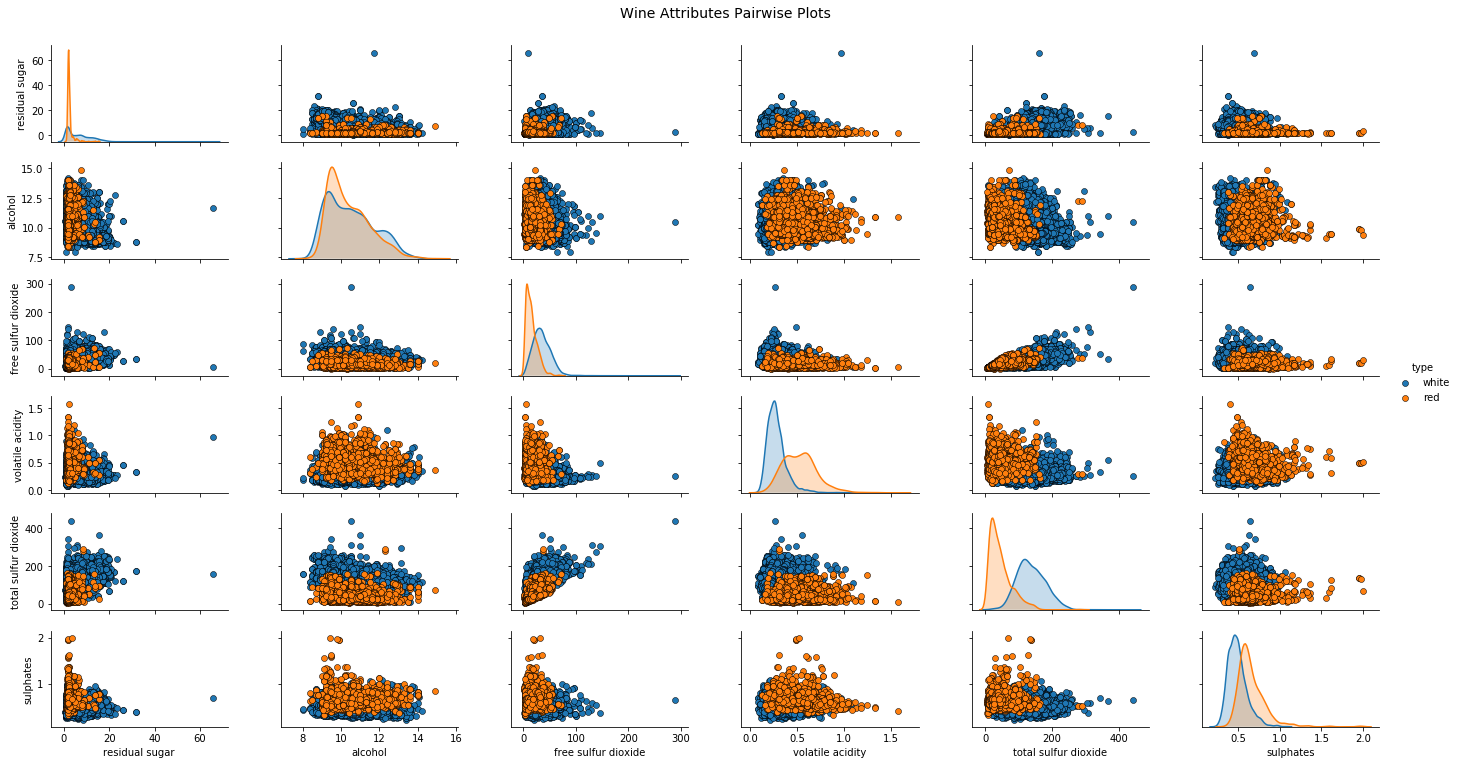

In [247]:
# We can also visualize patterns and relationships among multiple variables using pairwise plots. 
# use different hues for the wine type

columns = ['residual sugar', 'alcohol', 'free sulfur dioxide', 'volatile acidity', 
           'total sulfur dioxide', 'type', 'sulphates']

pair_plots = sns.pairplot(wine_data[columns], hue = 'type', height = 1.8, aspect = 1.8, 
                          plot_kws = dict(edgecolor = "black", linewidth =0.5))
fig = pair_plots.fig 
fig.subplots_adjust(top = 0.93, wspace = 0.3)
title = fig.suptitle('Wine Attributes Pairwise Plots', fontsize = 14)

**Observations:**
- Presence of higher sulphate levels in red wines as compared to white wines.
- Presence of higher volatile acidity levels in red wines as compared to white wines.
- Presence of higher total sulfur dioxide levels in white wines as compared to red wines.

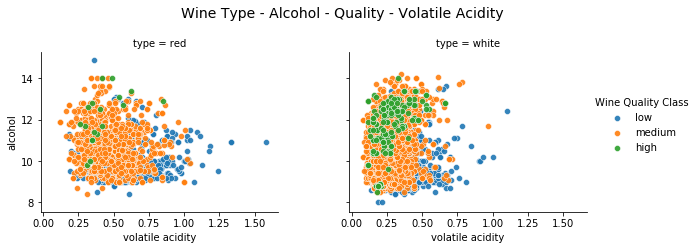

In [248]:
# Let’s try to visualize relationships between type, quality label, volatile acidity, and alcohol volume levels.

plot = sns.FacetGrid(data = wine_data, col = "type", hue= 'quality_label', col_order = ['red', 'white'], 
                     hue_order = ['low', 'medium', 'high'], aspect = 1.2, height = 3.5)
plot.map(plt.scatter, "volatile acidity", "alcohol", alpha = 0.9, edgecolor = 'white', linewidth = 0.5)
fig = plot.fig 
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Volatile Acidity', fontsize = 14)
plot.add_legend(title = 'Wine Quality Class')

**Observations:**
- We are able to successfully visualize four variables and we can see meaningful relationships among them. 
- Higher quality wines have lower levels of volatile acidity and higher levels of alcohol content as compared to wines with medium and low ratings. 
- Along with this we can also see that volatile acidity levels are slightly lower in white wine samples as compared to red wine samples.

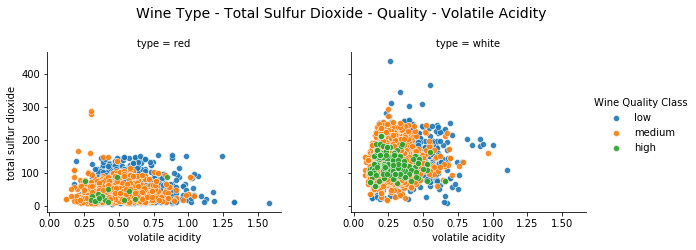

In [249]:
# Let’s try to visualize relationships between type, quality label, volatile acidity, and total sulfur dioxide volume levels.

plot = sns.FacetGrid(data = wine_data, col = "type", hue= 'quality_label', col_order = ['red', 'white'], 
                     hue_order = ['low', 'medium', 'high'], aspect = 1.2, height = 3.5)
plot.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha = 0.9, edgecolor = 'white', linewidth = 0.5)
fig = plot.fig 
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Total Sulfur Dioxide - Quality - Volatile Acidity', fontsize = 14)
plot.add_legend(title = 'Wine Quality Class')

**Observations:**
- We can easily interpret that volatile acidity and total sulfur dioxide is considerably lower in high quality wines.
- Total sulfur dioxide is considerably more in white wines as compared to red wines. 
- Volatile acidity levels are slightly lower in white wines as compared to red wines.

**Conclusions:**
- These are the most appropriate multivariate relationship that can be observed. No conclusions can be explained in other observations.

## Removing NaN Rows

In [250]:
wine_data.dropna(inplace = True)

In [251]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 14 columns):
type                    6463 non-null object
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
quality_label           6463 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 713.3+ KB


# Modeling

- Our main objectives of building predictive models to predict the wine types and quality ratings based on other features. 
    - Prediction system for wine type (red or white wine)
    - Prediction system for wine quality rating (low, medium, or high)

In [252]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [253]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
    
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4))
    
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
    
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))
                        

def display_confusion_matrix(true_labels, predicted_labels, classes = [1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true = true_labels, y_pred = predicted_labels, labels = classes)
    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(cm_frame) 
    
    
def display_classification_report(true_labels, predicted_labels, classes = [1,0]):

    report = metrics.classification_report(y_true = true_labels, y_pred = predicted_labels, labels = classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*130)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*130)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*130)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [254]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [202]:
# Converting to 'type' to categorical

# Applying FE
wine_data['type'] = wine_data['type'].astype('category')

In [210]:
# As we could not convert string to number for class so mapping the 'type' and 'quality_label' feature

wine_data["type"] = wine_data.type.map({"red":1, "white":0})
wine_data["quality_label"] = wine_data.quality_label.map({"low":0, "medium":1, "high":2})

In [255]:
feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

wine_features = wine_data[feature_columns]
wine_labels_type = wine_data['type']
wine_labels_quality = wine_data['quality_label']

## Train - Test Split 

In [256]:
# Train - Test Splitting for Wine Type Prediction

x_train_type , x_test_type, y_train_type, y_test_type = train_test_split(wine_features, wine_labels_type, 
                                                                         test_size = 0.3, random_state = 42)

In [257]:
# Train - Test Splitting for Wine Quality Prediction

x_train_quality , x_test_quality, y_train_quality, y_test_quality = train_test_split(wine_features, wine_labels_quality, 
                                                                         test_size = 0.3, random_state = 42)

## Feature Standardization

In [258]:
sc = StandardScaler()

# Feature Standardization For Wine Type

x_train_type = sc.fit_transform(x_train_type)
x_test_type = sc.transform(x_test_type)

# Feature Standardization For Wine Quality

x_train_quality = sc.fit_transform(x_train_quality)
x_test_quality = sc.transform(x_test_quality)

# Logistic Regression

In [259]:
# For Wine Type Prediction

from sklearn.linear_model import LogisticRegression

# Training
lr = LogisticRegression()
lr.fit(x_train_type, y_train_type)


C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [260]:
# Prediction
lr_pred_type = lr.predict(x_test_type)

In [262]:
# Performence Metrices 

display_model_performance_metrics(y_test_type, lr_pred_type, classes = ['red', 'white'])

Model Performance metrics:
----------------------------------------------------------------------------------------------------------------------------------
Accuracy: 0.9943
Precision: 0.9943
Recall: 0.9943
F1 Score: 0.9943

Model Classification report:
----------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       477
       white       1.00      1.00      1.00      1462

   micro avg       0.99      0.99      0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939


Prediction Confusion Matrix:
----------------------------------------------------------------------------------------------------------------------------------
              Predicted:      
                     red white
Actual: red          473     4
        white          7  1455


C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead


## Feature Importance

In [272]:
# get importance
importance = lr.coef_
print(importance)

[[-0.38284278 -1.13773467  0.33080119  2.85282181 -0.7636614  -0.76788589
   2.57371257 -3.25408894 -0.29977109 -0.60546002 -1.15621795]]


# End Results

- We get an overall F1 Score and model accuracy of 99.2%, which is really amazing! 
- In spite of low samples of red wine, we seem to do pretty well.
- This proves that we don’t always need big data but good quality data and features.
- In case our models do not perform well on other datasets due to a class imbalance problem, we can consider over-sampling or under-sampling techniques including sample selection as well as SMOTE.

# End of File